In [264]:
import matplotlib.pyplot as plt

from scipy import stats

import pandas as pd
import numpy as np

np.random.seed(123)

In [265]:
import os
from env import host, username, password


# # 1


# A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.


# What is the probability that no cars drive up in the noon hour?


In [266]:
mean = 2

stats.poisson(mean).pmf(0)

0.1353352832366127

In [267]:
n_sim = 100_000
n_driver = 1
outcomes = ["y","n"]

In [268]:
pull = np.random.choice(outcomes,size = (n_sim,n_driver),p=[.90,.10])
pull = pd.DataFrame(pull)
pull.head()
pull_sim = ( pull == "n").sum(axis=1)


In [269]:
pull_sim.mean()

0.09952

# graphing

<BarContainer object of 24 artists>

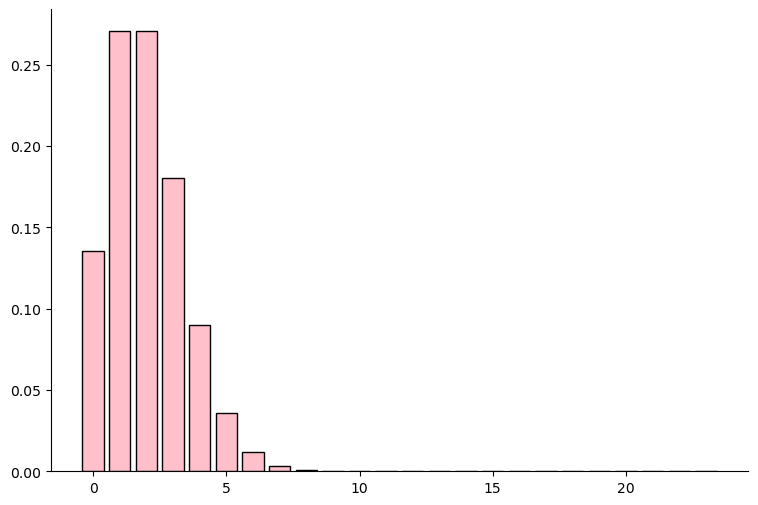

In [270]:
x = np.arange (0,24)
y = stats.poisson(mean).pmf(x)
plt.bar(x,y,edgecolor='black', color='pink')

# What is the probability that 3 or more cars come through the drive through?

In [271]:
stats.poisson(mean).sf(2)

0.32332358381693654

<BarContainer object of 7 artists>

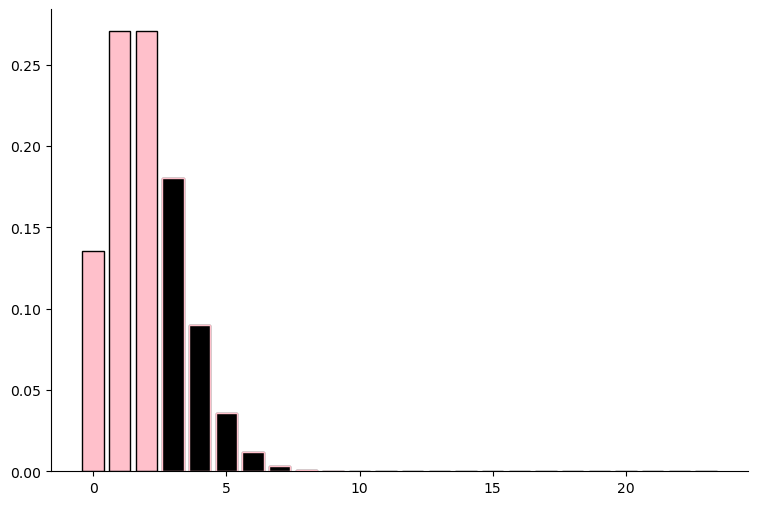

In [272]:
x = np.arange (0,24)
y = stats.poisson(mean).pmf(x)
plt.bar(x,y,edgecolor='black', color='pink')

# plot different color
x1 = np.arange(3,10)

y1 = stats.poisson(mean).pmf(x1)

plt.bar(x1,y1,edgecolor='pink', color='black')



# How likely is it that the drive through gets at least 1 car?



In [273]:
stats.poisson(mean).sf(0)

0.8646647167633873

<BarContainer object of 9 artists>

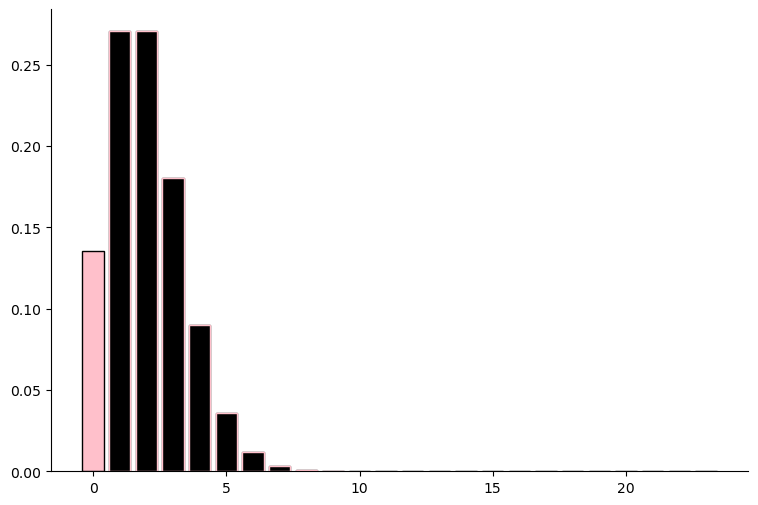

In [274]:
x = np.arange (0,24)
y = stats.poisson(mean).pmf(x)
plt.bar(x,y,edgecolor='black', color='pink')

x1 = np.arange(1,10)

y1 = stats.poisson(mean).pmf(x1)

plt.bar(x1,y1,edgecolor='pink', color='black')



# 2

# Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [312]:
mean = 3.0
std = .3

gpa = stats.norm(mean, std)

In [276]:
# return evenly spaced numbers over a specified interval.
# returns num evenly spaced samples, calculated over the interval [start, stop].
# the endpoint of the interval can optionally be excluded.

In [313]:
x = np.linspace(mean - 4 * std, mean + 4 * std)
y = gpa.pdf(x)

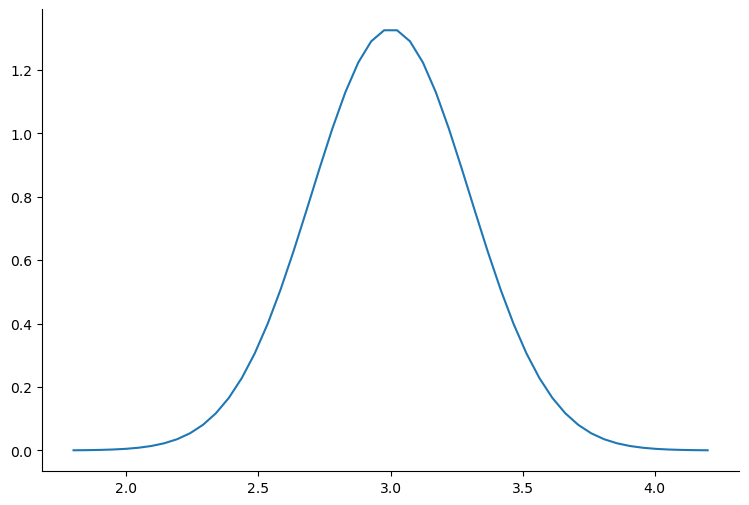

In [278]:
plt.plot(x,y)

In [279]:
#(x, ymin, ymax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)

# What grade point average is required to be in the top 5% of the graduating class

In [314]:
top_five = gpa.isf(.05)
top_five

3.4934560880854417

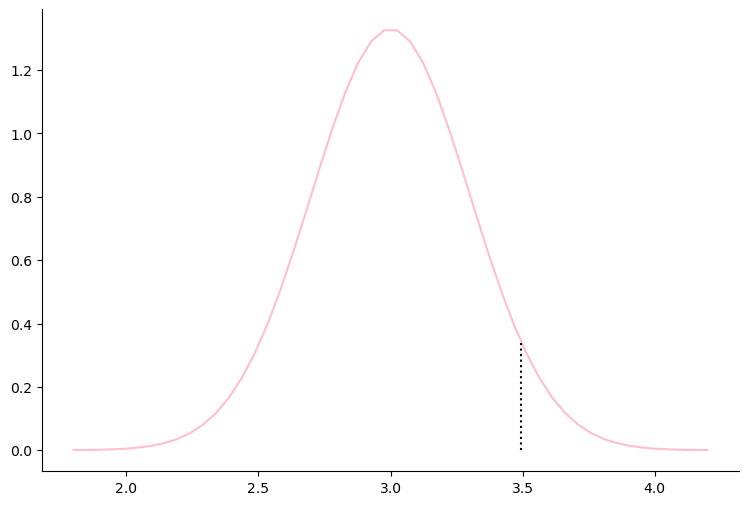

In [315]:
plt.plot(x, y, color='pink')
plt.vlines(top_five , 0, gpa.pdf(top_five),linestyles = "dotted",colors = "black")


# What GPA constitutes the bottom 15% of the class?

In [319]:
bottom_fifteen = gpa.ppf(.15)
bottom_fifteen

2.689069983151863

In [320]:
# orrrr
bottom_fifteen = gpa.isf(.85)
bottom_fifteen

2.689069983151863

# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [325]:
gpa_range = gpa.ppf([.20,.30])
gpa_range
# yes

array([2.74751363, 2.84267985])

In [326]:
(gpa_range[0] < 2.8) and (gpa_range[1] > 2.8)

True

# If I have a GPA of 3.5, what percentile am I in?

In [283]:
ninefive = gpa.cdf(3.5)
ninefive

0.9522096477271853

# # 3 A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [327]:
clicks = stats.binom(4326, .02)

In [284]:
stats.binom(4326, .02).sf(96)

0.13975823631416445

In [328]:
clicks.sf(96)

0.13975823631416445

# sim

# 4 What is the probability that at least one of your first 60 answers is correct?

In [334]:
stats.binom(60, .01).sf(0)

0.45284335760923855

# 5

# suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [286]:
# 3 percent chance of clean
clean = .03

visit = 60

In [ ]:
#clean on any given day

In [340]:
stats.binom(60, .03).sf(0)

0.8391933309784231

In [341]:

1 - stats.binom(120, .03).sf(0)

0.025858784801815027

In [345]:
1 - stats.binom(300, .03).sf(0)

0.00010752768104904664

<BarContainer object of 10 artists>

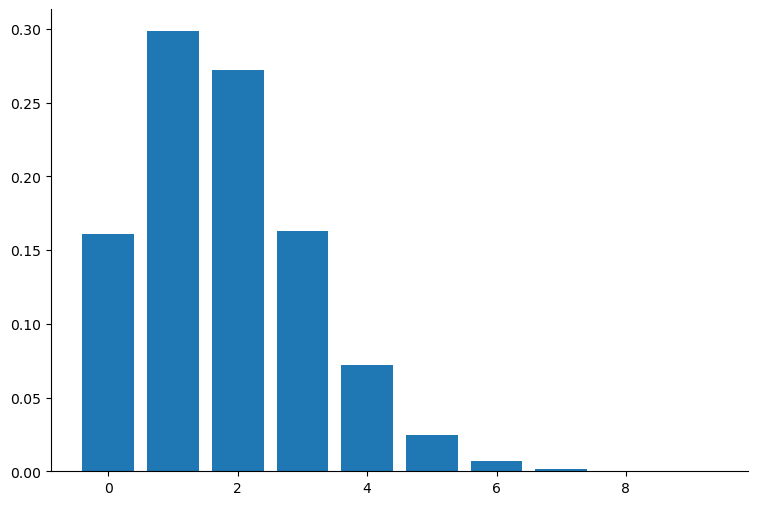

In [339]:
x = np.arange(0,10)
y = stats.binom(60,.03).pmf(x)
plt.bar(x,y)

# 6

# You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [350]:
mean_people = 15
std_people = 3

mean_min = mean_people * 2
std_min = std_people * 2

time = 60 - 15 - 10 - 2
time

33

In [352]:
stats.norm(mean_min, std_min).cdf(time)

0.6914624612740131

Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?
What percent of employees earn more than 95,000?
What percent of employees earn between 65,000 and 80,000?
What do the top 5% of employees make?


In [292]:
def get_db_url(host, username, password, db):
    
    '''
    return a formatted string containing username,
    password, host and db for MySQL SERVER AND DB.
    The env_file check to see if the env.py exist in current working directory
    
    '''
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

In [293]:
url = get_db_url(host, username, password, 'employees')

In [294]:
query = '''
SELECT *
FROM salaries as s
WHERE s.to_date > NOW()

'''


In [295]:
# chip_query = 'SELECT * FROM orders'

In [355]:
salaries = pd.read_sql(query, url)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [356]:
mean = salaries.salary.mean()
mean

72012.23585730705

In [357]:
std =  salaries.salary.std()

In [358]:
std

17309.99538025198

# less 60_000

In [359]:
stats.norm(mean, std).cdf(60_000)

0.24385742480214423

In [360]:
salaries.count()

emp_no       240124
salary       240124
from_date    240124
to_date      240124
dtype: int64

In [302]:
salaries[salaries.salary <= 60000].count()

emp_no       64981
salary       64981
from_date    64981
to_date      64981
dtype: int64

In [303]:
 64981 / 240124 

0.270614349252886

# more than 95,000

In [304]:
stats.norm(mean, std).sf(95000)

0.09208819199804053

In [305]:
salaries[salaries.salary > 95_000].count()

emp_no       26084
salary       26084
from_date    26084
to_date      26084
dtype: int64

In [306]:
26084 / 240124 

0.1086272092752078

In [307]:
# What percent of employees earn between 65,000 and 80,000?

In [361]:
np.diff(stats.norm(mean,std).cdf([65_000,80000]))
        

array([0.33506057])

In [309]:
 0.65729708 - 0.32223651

0.33506057

In [310]:
# What do the top 5% of employees make?


In [311]:
stats.norm(mean,std).isf(.05)


100484.64454102777

In [365]:
stats.norm(mean,std).isf(.01)

112281.30680981302